Convolutional Neural Networks work well with images.

In this notebook, a CNN model is construcsted with the [Food-101 dataset](https://https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection a 101 different categories of 101,000 (1000 images per category) real-world images of food dishes for computer vision (detecting patterns in visual data) following the construction of [Zero to Mastery TensorFlow for Deep Learning](https://https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/) as a preparation for Google [TensorFlow Developer Certificate](https://https://www.tensorflow.org/certificate).

In [1]:
import zipfile
import os
import random
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

# Import and become one with the data

In [2]:
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2022-05-21 19:58:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   299MB/s    in 1.7s    

2022-05-21 19:58:24 (299 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# Walk through 10 classes of images
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 10 directories and 0 ima

In [4]:
# Set up the train and test directories
train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

In [5]:
# Get class names
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [6]:
# Visualize a random image
def view_random_image(target_dir, target_class):
  # Set the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 512, 3)


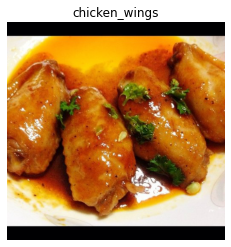

In [7]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

# Preprocess the data

In [8]:
# Preprocess with data augmentation
train_datagen = ImageDataGenerator(rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=[0.2, 0.8],
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, 
                                              target_size=(224, 224),
                                              batch_size=32,
                                              seed=42)

test_data = train_datagen.flow_from_directory(test_dir, 
                                             target_size=(224, 224),
                                             batch_size=32,
                                             seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Create a CNN model

In [9]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
                             tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                             tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
                             tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(len(class_names), activation='softmax')])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

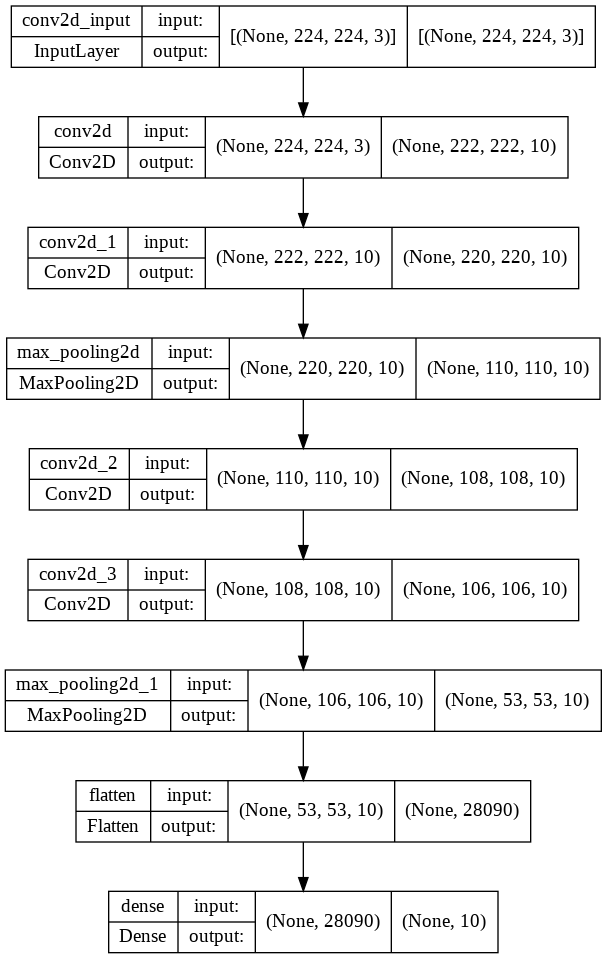

In [11]:
plot_model(model, show_shapes=True)

# Fit the model

In [12]:
history = model.fit(train_data,
                   epochs=10,
                   validation_data=test_data)

Epoch 1/10
235/235 [==============================] - 163s 645ms/step - loss: 2.2205 - accuracy: 0.1680 - val_loss: 2.1048 - val_accuracy: 0.2264
Epoch 2/10
235/235 [==============================] - 149s 635ms/step - loss: 2.0962 - accuracy: 0.2359 - val_loss: 2.0747 - val_accuracy: 0.2492
Epoch 3/10
235/235 [==============================] - 149s 634ms/step - loss: 2.0561 - accuracy: 0.2660 - val_loss: 2.0144 - val_accuracy: 0.2812
Epoch 4/10
235/235 [==============================] - 149s 633ms/step - loss: 2.0206 - accuracy: 0.2829 - val_loss: 1.9523 - val_accuracy: 0.3104
Epoch 5/10
235/235 [==============================] - 149s 632ms/step - loss: 1.9914 - accuracy: 0.2969 - val_loss: 1.9305 - val_accuracy: 0.3320
Epoch 6/10
235/235 [==============================] - 147s 627ms/step - loss: 1.9713 - accuracy: 0.3052 - val_loss: 1.9179 - val_accuracy: 0.3300
Epoch 7/10
235/235 [==============================] - 148s 628ms/step - loss: 1.9368 - accuracy: 0.3201 - val_loss: 1.8776 -

# Evaluate the model

In [14]:
model.evaluate(test_data)

79/79 [==============================] - 36s 458ms/step - loss: 1.8049 - accuracy: 0.3652


[1.8049269914627075, 0.365200012922287]

In [18]:
# Plot loss curves
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = history.epoch

  plt.figure(figsize=(12, 5))
  
  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Validation loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='Training accuracy')
  plt.plot(epochs, val_accuracy, label='Validation accuracy')
  plt.xlabel('Epochs')
  plt.legend()

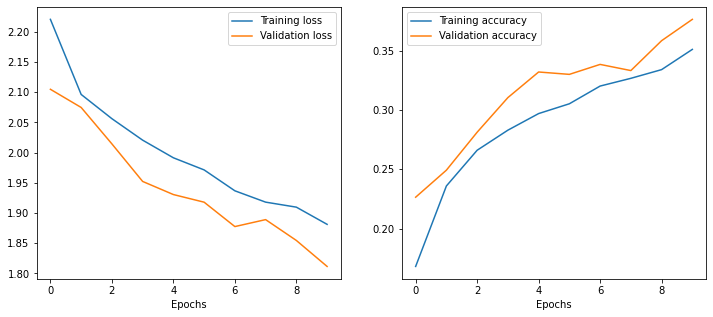

In [19]:
plot_loss_curves(history)

# Make predictions on real-life data

In [20]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [21]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-05-21 20:33:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-05-21 20:33:52 (40.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-05-21 20:33:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [24]:
# Define a function to import image and preprocess
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [31]:
# Define a function to predict an image and plot it
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

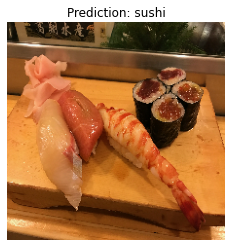

In [32]:
pred_and_plot(model, '03-sushi.jpeg')

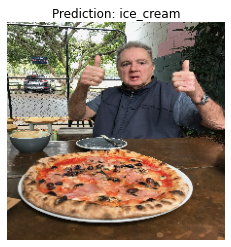

In [33]:
pred_and_plot(model, '03-pizza-dad.jpeg')

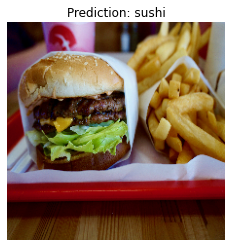

In [34]:
pred_and_plot(model, '03-hamburger.jpeg')

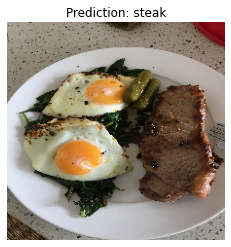

In [37]:
pred_and_plot(model, '03-steak.jpeg')

# Save and load the model

In [38]:
# Save the model with all states and values
model.save('computer_vision_CNN.h5')

In [40]:
# Load the model
loaded_model = tf.keras.models.load_model('computer_vision_CNN.h5')
loaded_model.evaluate(test_data)

79/79 [==============================] - 38s 470ms/step - loss: 1.8039 - accuracy: 0.3652


[1.8039039373397827, 0.365200012922287]